## Reading images and videos

In [1]:
# reading images
import cv2 as cv

img = cv.imread(r'C:\Users\Prasanna dindi\OneDrive\Desktop\udemy course\openCV\Images\rgbimage.jpg')

cv.imshow('cat',img)

cv.waitKey(0)

-1

In [2]:
# reading videos
capture = cv.VideoCapture(".//video.mp4")

while True:
    isTrue,frame = capture.read()
    cv.imshow('video',frame)
    if cv.waitKey(20) & 0xFF == ord('d'):
        break
capture.release()
cv.destroyAllWindows()

## Resizing and Rescaling Frames

In [3]:
# resizing videos
# rescale frame work for videos images and live videos
def rescaleFrame(frame,scale = 0.25):# we can use 0.75 or any thing standard is 0.75
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
    dimensions = (width,height)

    return cv.resize(frame,dimensions, interpolation= cv.INTER_AREA)

capture = cv.VideoCapture("video.mp4")

while True:
    isTrue,frame = capture.read()
    frame_resized = rescaleFrame(frame)

    cv.imshow('video',frame)
    cv.imshow('video_resized',frame_resized)
    
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

capture.release()
cv.destroyAllWindows()

In [6]:
#resizing image
#reading of an image code is in first cell
resized_img = rescaleFrame(img)
cv.imshow("cat",resized_img)
cv.waitKey(0)

-1

In [7]:
# changing the resolution of the live videos
def changeres(width , height):
    capture.set(3,width)
    capture.set(4,height)

# check in chatgpt

In [1]:
import numpy as np
import cv2 as cv

blank = np.zeros((500,500,3),dtype = 'uint8')   # for black color  window
cv.imshow("blank",blank)

blank[:] = 0,255,0   # for green color winodw
cv.imshow("green",blank)

blank[:] = 255,0,0   # for red color window
cv.imshow("red",blank)

blank[:] = 0,0,255   # for blue color window
cv.imshow("blue",blank)

blank[:] = 255,255,255    # for white color window
cv.imshow("white",blank)

cv.waitKey(0)

-1

In [2]:
# also we can also work on some pixels on the image
blank[200:400,300:350] = 0,255,0
cv.imshow("pixel",blank)

cv.waitKey(0)

-1

## Drawing shapes and Putting Text

In [6]:
# we can draw a triagle 
cv.rectangle(blank,(0,0),(250,250),(0,255,255),thickness=2,lineType=2)
cv.imshow("rectangle",blank)

cv.waitKey(0)

-1

In [15]:
# to draw circle, rectangle, and line and also test
# here thickness is a function which is used for defining the thickness. if it is -1 the object is completely
# filled with the corresponding color give in form of RGB

import numpy as np
import cv2 as cv

blank = np.zeros((500,500,3))
blank[:] = 255,255,255
cv.circle(blank,(250,250),50,(0,255,255),thickness=-1)
cv.rectangle(blank,(0,0),(255,255),(0,255,0),thickness=-1)
cv.putText(blank,"hello prasanna",(125,255),cv.FONT_HERSHEY_SIMPLEX,1.0,(0,0,0))
cv.line(blank,(255,255),(500,500),(255,0,255),thickness=4)
cv.imshow("blank",blank)
cv.waitKey(0)

-1

## Essential Functions in OpenCV

In [6]:
# converting a rgb color image to gray scale image
import cv2 as cv

img = cv.imread('rgbimage.jpg')
img_new = cv.resize(img,(400,400))
cv.imshow("image",img_new)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_new = cv.resize(gray,(400,400))
cv.imshow("grayimage",gray_new)

cv.waitKey(0)

-1

In [2]:
# blurring of an image
import cv2 as cv

img = cv.imread("rgbimage.jpg")
img = cv.resize(img,(500,500))
blur = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)
cv.imshow("blur",blur)
cv.waitKey(0)

-1

In [3]:
# edge cascade
# canny = cv.Canny(blur,125,175)
# cv.imshow("edge",canny)
# cv.waitKey(0)

canny = cv.Canny(img,125,175)
cv.imshow("edge",canny)
cv.waitKey(0)

-1

In [4]:
#dialating the image 
dilated = cv.dilate(canny, (7,7),iterations=3)
cv.imshow("dilated",dilated)
cv.waitKey(0)

-1

In [5]:
# eroding
eroded = cv.erode(dilated,(3,3),iterations=1)
cv.imshow('eroded',eroded)
cv.waitKey(0)

-1

In [8]:
# resize the images I already done before refer it
img_resized = cv.resize(img,(500,500),interpolation=cv.INTER_AREA)
cv.imshow("resized_img",img_resized)
cv.imshow("img",img)
cv.waitKey(0)

-1

In [10]:
# cropping
cropped = img[50:200,100:300]
cv.imshow("cropped",cropped)
cv.imshow("img",img)
cv.waitKey(0)

-1

## Image Transformation

In [3]:
import cv2 as cv
import numpy as np

# translation
image = cv.imread('light_of_sunset_on_the_400_trail_in_wisconsin_593740.jpg')
cv.imshow('original',image)

def translate(image,x,y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimension = (image.shape[1],image.shape[0]) # (width,height)
    return cv.warpAffine(image,transMat,dimension)

translated = translate(image,100,200)
cv.imshow('translate',translated)

cv.waitKey(0)

-1

In [3]:
# Rotation
cv.imshow('original',image)
def rotate(image,angle,rot_point = None):
    (height,width) = image.shape[:2]
    
    if rot_point == None:
        rot_point = (width//2,height//2)
    
    rotMat = cv.getRotationMatrix2D(rot_point,angle,1.0)
    dimension = (width,height)
    return cv.warpAffine(image,rotMat,dimension)

rotated = rotate(image,30)
cv.imshow('rotated',rotated)
cv.waitKey(0)

-1

In [4]:
# scaling
cv.imshow('original',image)
scaled = cv.resize(image,(500,500),interpolation=cv.INTER_CUBIC)
cv.imshow('scaled',scaled)
cv.waitKey(0)

-1

In [12]:
# flipping
cv.imshow('original',image)
flip1 = cv.flip(image,0)
flip2 = cv.flip(image,1)
flip3 = cv.flip(image,-1)

cv.imshow('flip1',flip1)
cv.imshow('flip2',flip2)
cv.imshow('flip3',flip3)

cv.waitKey(0)

-1

In [13]:
# cropping
crop = image[200:300,300:400]
cv.imshow('croped',crop)
cv.waitKey(0)

-1

## Contours Detection

In [7]:
# gray-scale
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(gray_image,125,255,cv.THRESH_BINARY)
cv.imshow('thresh',thresh)
cv.imshow('gray',gray_image)
blur = cv.GaussianBlur(gray_image,(5,5),cv.BORDER_DEFAULT)
cv.imshow('blur',blur)
cv.waitKey(0)

-1

In [5]:
# edge detection
canny = cv.Canny(blur,125,175)
cv.imshow('canny',canny)
contours,hierarchies = cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} founded!')
cv.waitKey(0)

136 founded!


-1

## Color Spaces

In [7]:
# converting BGR to gray 
import cv2 as cv

image = cv.imread('light_of_sunset_on_the_400_trail_in_wisconsin_593740.jpg')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

cv.imshow('original',image)
cv.imshow('gray',gray)

cv.waitKey(0)

-1

In [8]:
# BGR to HSV(hue,saturation,value)
hsv = cv.cvtColor(image,cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)
cv.waitKey(0)

-1

In [9]:
# BGR to LAB(L*A*B)
lab = cv.cvtColor(image,cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)
cv.waitKey(0)

-1

(-0.5, 599.5, 399.5, -0.5)

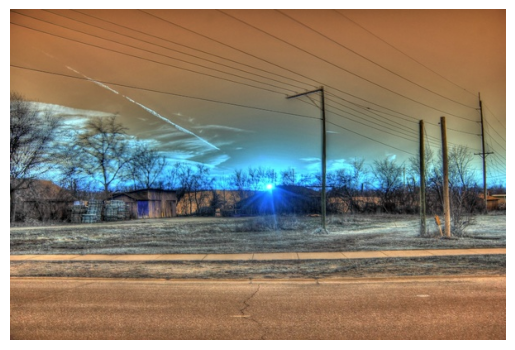

In [11]:
# Here I am reading the image in openCV and print it in matplotlib by default input of openCV is BGR
# Thatswhy it is shown like this
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')

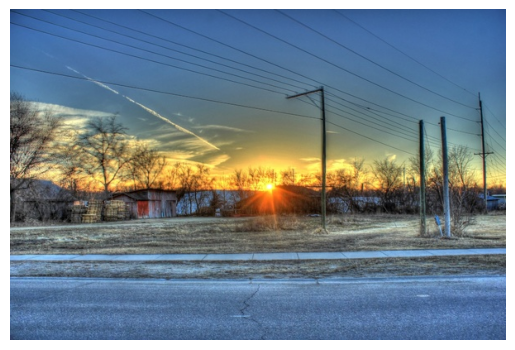

In [14]:
# reading and printing in matplotlib form
img = plt.imread('light_of_sunset_on_the_400_trail_in_wisconsin_593740.jpg')
plt.axis('off')
plt.imshow(img)

In [12]:
# BGR to RGB
import cv2 as cv
image = cv.imread('light_of_sunset_on_the_400_trail_in_wisconsin_593740.jpg')
cv.imshow('original',image)
image_RGB = cv.cvtColor(image,cv.COLOR_BGR2RGB)
cv.imshow('RGB',image_RGB)
cv.waitKey(0)

-1

In [5]:
# we cannot convert gray scale image to hsv directly 
# we convert gray to bgr  then convert it to hsv
# we can convert reverse of all above formats

In [15]:
# converting hsv to bgr
cv.imshow('hsv',hsv)
hsv_bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
cv.imshow('hsv_bgr',hsv_bgr)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
# converting lab to bgr
cv.imshow('lab',lab)
lab_bgr = cv.cvtColor(lab,cv.COLOR_LAB2BGR)
cv.imshow('lab_bgr',lab_bgr)
cv.waitKey(0)

-1

In [17]:
# like this we can convert any of the above color formats

## Color Channels

In [20]:
# splitting the channels in the image
cv.imshow('image',image)
b,g,r = cv.split(image)

cv.imshow('blue',b)
cv.imshow('green',g)
cv.imshow('red',r)

print(image.shape)
print(b.shape)
print(g.shape)
print(r.shape)
cv.waitKey(0)

(400, 600, 3)
(400, 600)
(400, 600)
(400, 600)


-1

In [23]:
# merging the image colors
import numpy as np
blank = np.zeros(image.shape[:2],dtype='uint8')
cv.imshow('blank',blank)
blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])
cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)
cv.waitKey(0)

-1

## Blurring Techniques

In [27]:
# Averaging
cv.imshow('original',image)
average = cv.blur(image,(7,7))
cv.imshow('image',image)
cv.waitKey(0)

-1

In [29]:
# guassian
guass = cv.GaussianBlur(image,(7,7),0)
cv.imshow('guassian',guass)
cv.waitKey(0)

-1

In [32]:
# Meidan blur
median = cv.medianBlur(image,3)
cv.imshow('medain',median)
cv.waitKey(0)

-1

In [33]:
# Bilateral blurring
bilateral = cv.bilateralFilter(image,5,15,15)
cv.imshow('bilateral',bilateral)
cv.waitKey(0)

-1

## Bitwise operators

In [ ]:
blank = np.zeros((400,400),dtype='uint8')
rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)
cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)
cv.waitKey(0)

-1

In [35]:
# bitwise and operator
b_and = cv.bitwise_and(rectangle,circle)
cv.imshow('b_and', b_and)
cv.waitKey(0)

-1

In [36]:
# bitwise or operator
b_or = cv.bitwise_or(rectangle,circle)
cv.imshow('b_or',b_or)
cv.waitKey(0)

-1

In [37]:
# bitwise xor operator
b_xor = cv.bitwise_xor(rectangle,circle)
cv.imshow('b_xor',b_xor)
cv.waitKey(0)

-1

In [38]:
# bitwise not operator
b_not = cv.bitwise_not(circle)
cv.imshow('b_not',b_not)
cv.waitKey(0)

-1

## Masking

In [1]:
import cv2 as cv
import numpy as np

img = cv.imread('light_of_sunset_on_the_400_trail_in_wisconsin_593740.jpg')
blank = np.zeros(img.shape[:2],dtype='uint8')
cv.imshow('blank',blank)
mask = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv.imshow('mask',mask)
cv.waitKey(0)

-1

In [2]:
# masked image generating
masked = cv.bitwise_and(img , img, mask=mask)
cv.imshow('masked image',masked)
cv.waitKey(0)

-1

## Computing Histograms

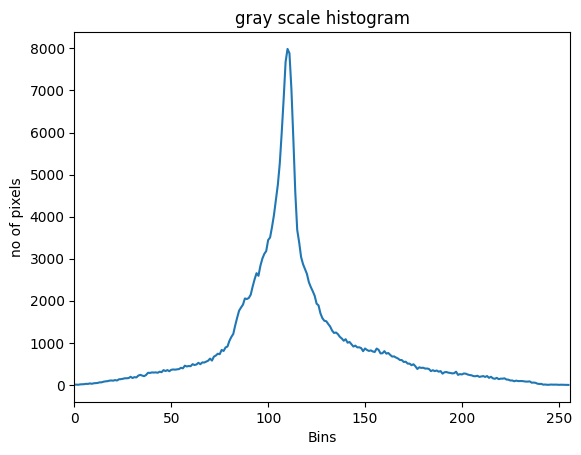

-1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('light_of_sunset_on_the_400_trail_in_wisconsin_593740.jpg')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

gray_hist = cv.calcHist([gray],[0], None, [256], [0,256])
plt.figure()
plt.title('gray scale histogram')
plt.xlabel('Bins')
plt.ylabel('no of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)

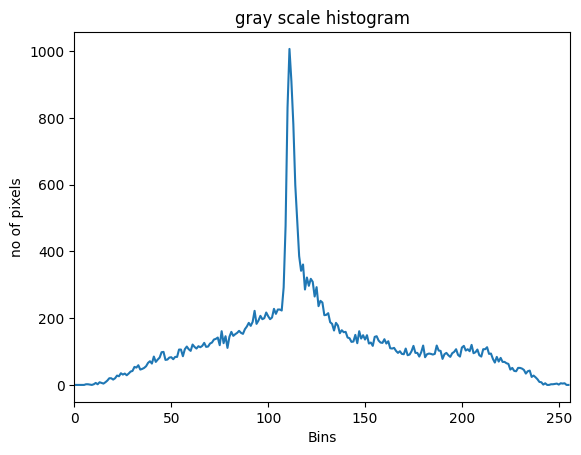

-1

In [3]:
# histogram with mask
blank = np.zeros(image.shape[:2],dtype='uint8')
circle = cv.circle(blank,(image.shape[1]//2,image.shape[0]//2),100,255,-1)
mask = cv.bitwise_and(gray, gray, mask = circle)
cv.imshow('mask',mask)

gray_hist = cv.calcHist([gray],[0], mask, [256], [0,256])
plt.figure()
plt.title('gray scale histogram')
plt.xlabel('Bins')
plt.ylabel('no of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)

In [2]:
# do it in noraml python rather than python notebook keep it mind. otherwise if any mistate happen the
# kernel will dead so you need to restart the kernel again and execute from the first line

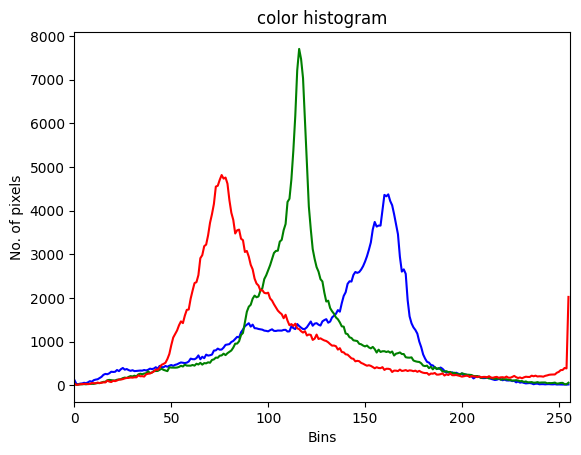

-1

In [4]:
# color histogram without mask
colors = ['b','g','r']
for i,col in enumerate(colors):
    hist  = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
plt.title('color histogram')
plt.xlabel('Bins')
plt.ylabel('No. of pixels')
plt.show()
cv.waitKey(0)

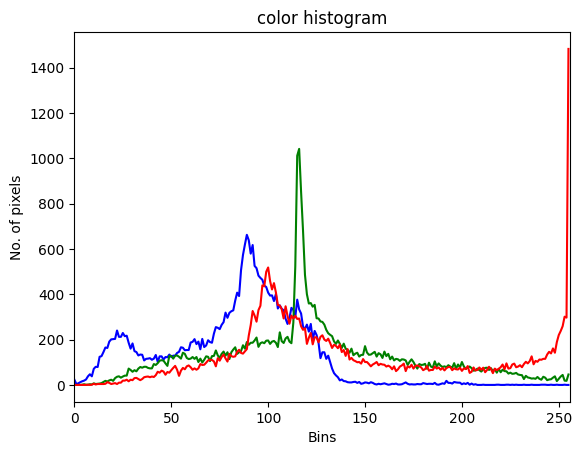

-1

In [10]:
# color histogram with mask
colors = ['b','g','r']
for i,col in enumerate(colors):
    hist  = cv.calcHist([image],[i],mask,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
plt.title('color histogram')
plt.xlabel('Bins')
plt.ylabel('No. of pixels')
plt.show()
cv.waitKey(0)

## Thresholding and Binarizing Images

In [5]:
# Simple Thresholding
threshold,thresh = cv.threshold(gray,150,255,cv.THRESH_BINARY)
cv.imshow('threshold',thresh)
cv.waitKey(0)

-1

In [6]:
# Inverse of the threshold
threshold,thresh_inv = cv.threshold(gray,150,255,cv.THRESH_BINARY_INV)
cv.imshow('threshold inverse',thresh_inv)
cv.waitKey(0)

-1

In [7]:
# Adaptive threshold
adaptive_thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3)
cv.imshow('adaptive threshold',adaptive_thresh)
cv.waitKey(0)

-1

In [12]:
# Adaptive threshold
adaptive_thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,9)
cv.imshow('adaptive threshold',adaptive_thresh)
cv.waitKey(0)

-1

In [14]:
# Adaptive threshold
adaptive_thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,9)
cv.imshow('adaptive threshold',adaptive_thresh)
cv.waitKey(0)

-1

## Edge Detection

In [ ]:
# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('laplacian',lap)

cv.waitKey(0)

-1

In [3]:
# Sobel
sobelx = cv.Sobel(gray,cv.CV_64F,1,0)
sobely = cv.Sobel(gray,cv.CV_64F,0,1)
cv.imshow('sobelx',sobelx)
cv.imshow('sobely',sobely)
cv.waitKey(0)

-1

In [5]:
# both x and y
combined_sobel = cv.bitwise_or(sobelx,sobely)
cv.imshow('combined sobel',combined_sobel)
cv.waitKey(0)

-1

In [6]:
# canny images comparing
canny = cv.Canny(gray,150,175)
cv.imshow('canny',canny)
cv.waitKey(0)

-1

## Face Detection with Haar Cascades

In [11]:
import cv2 as cv

img = cv.imread('360_F_243123463_zTooub557xEWABDLk0jJklDyLSGl2jrr.jpg')
cv.imshow('Person',img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')
faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)
print(f'the no of faces found is {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)
cv.imshow('Detected Face',img)

cv.waitKey(0)

the no of faces found is 1


-1

In [ ]:
import cv2 as cv

img = cv.imread('Images/360_F_297978660_S0cbqK2UYJ6x5FTaIktL1WyVBlTdCqAU.jpg')
cv.imshow('group of peole',img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')
faces_rect = haar_cascade.detectMultiScadle(gray,scaleFactor=1.1,minNeighbors=1)
print(f'the no of faces found is {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)
cv.imshow('Detected Face',img)

cv.waitKey(0)

the no of faces found is 3


-1

## Face Recognizer with openCVs built in recognizer

In [1]:
import os
import cv2 as cv
import numpy as np

In [2]:
# and another topic is face detection using deep vision simpsons

## college works

Text(0.5, 1.0, 'bottom right')

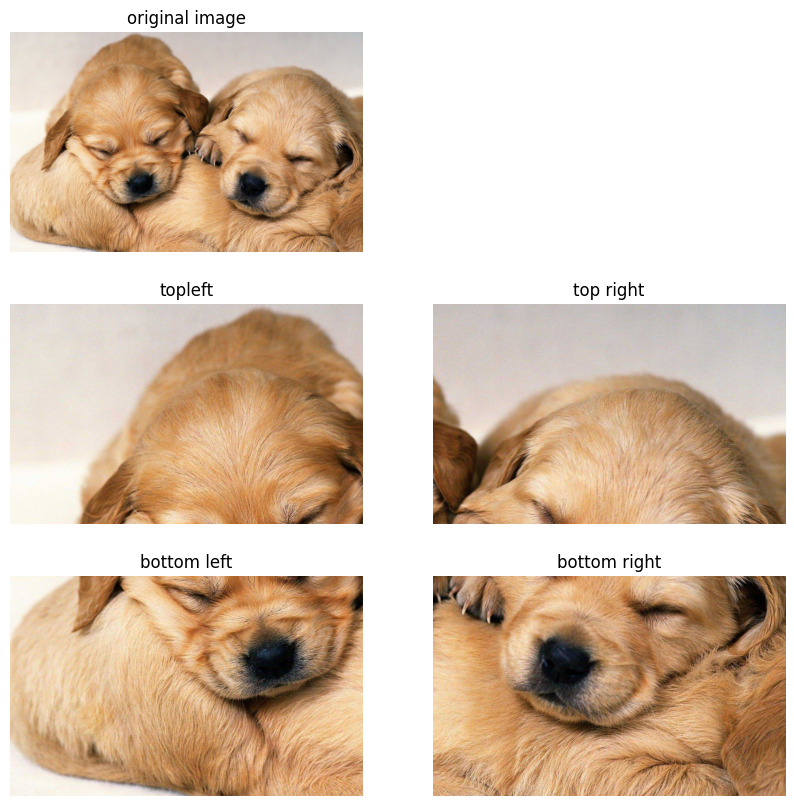

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
image = plt.imread(r'C:\Users\Prasanna dindi\OneDrive\Desktop\udemy course\openCV\Images\puppy.jpg')
(h,w) = image.shape[:2]
(cx,cy)=(w//2,h//2)
#image = image[:,:,::-1]
topleft = image[0:cy,0:cx]
topright = image[0:cy,cx:w]
bottomeleft = image[cy:h,0:cx]
bottomright = image[cy:h,cx:w]

plt.subplot(3,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("original image")

plt.subplot(3,2,3)
plt.imshow(topleft)
plt.axis('off')
plt.title("topleft")

plt.subplot(3,2,4)
plt.imshow(topright)
plt.axis('off')
plt.title("top right")

plt.subplot(3,2,5)
plt.imshow(bottomeleft)
plt.axis('off')
plt.title("bottom left")

plt.subplot(3,2,6)
plt.imshow(bottomright)
plt.axis('off')
plt.title("bottom right")


Text(0.5, 1.0, 'translated image')

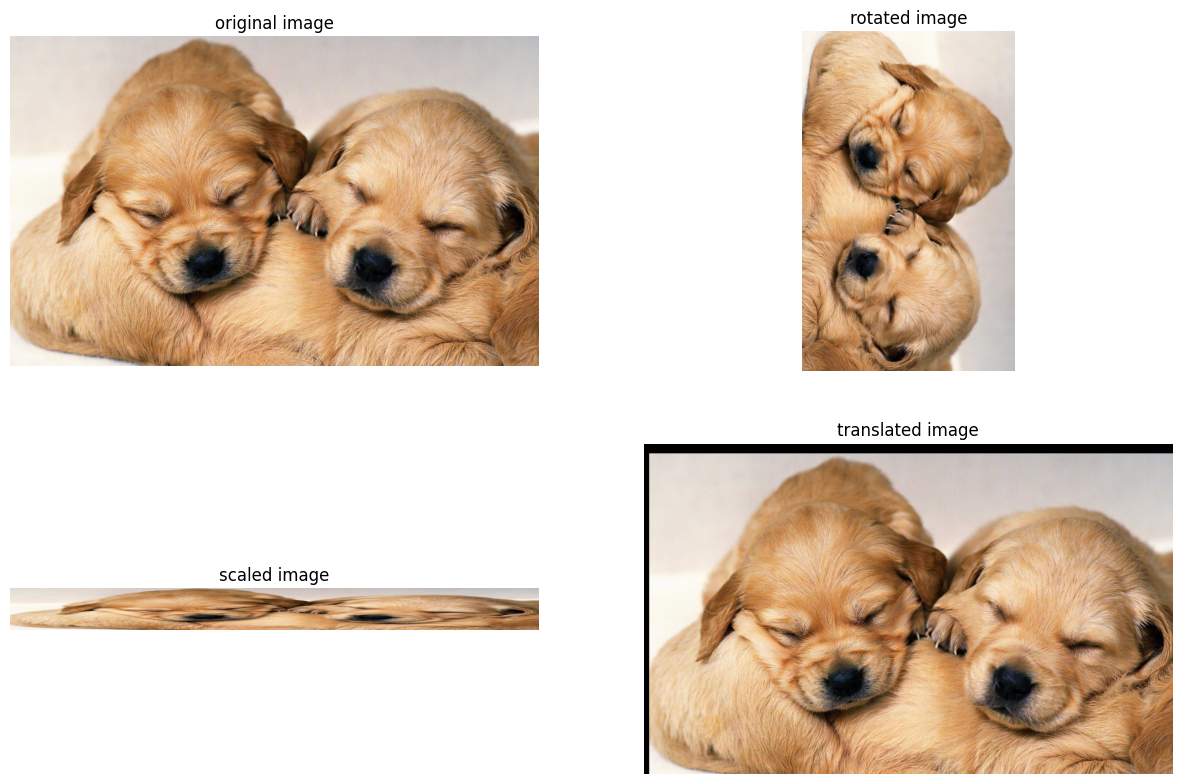

In [ ]:
import numpy as np
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('original image')

rotated = cv.rotate(image,cv.ROTATE_90_CLOCKWISE)
plt.subplot(3,2,2)
plt.imshow(rotated)
plt.axis('off')
plt.title("rotated image")

(h,w) = image.shape[:2]
dim = (w,200)
scaled = cv.resize(image,dim,interpolation=cv.INTER_AREA)
plt.subplot(3,2,3)
plt.imshow(scaled)  
plt.axis('off')
plt.title('scaled image')

M = np.float32([[1,0,25],[0,1,50]])
translated = cv.warpAffine(image,M,(w,h))
plt.subplot(3,2,4)
plt.imshow(translated)
plt.axis('off')
plt.title('translated image')

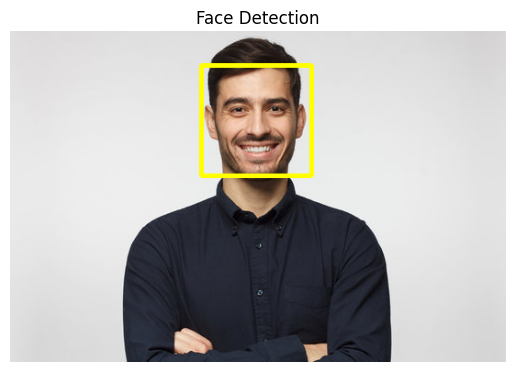

In [24]:
import cv2 as cv
from matplotlib import pyplot as plt

# Read the image
image = cv.imread(r'C:\Users\Prasanna dindi\OneDrive\Desktop\udemy course\openCV\Images\singe face image.jpg')  # Replace 'path_to_image.jpg' with the path to your image file.

# Convert the image to grayscale (required for Haar cascades)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Load the Haar cascade for face detection
face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_classifier.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(40, 40)
)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 4)  # Yellow rectangle (BGR: (0, 255, 255))

# Convert the image to RGB format for displaying with Matplotlib
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.title('Face Detection')
plt.show()


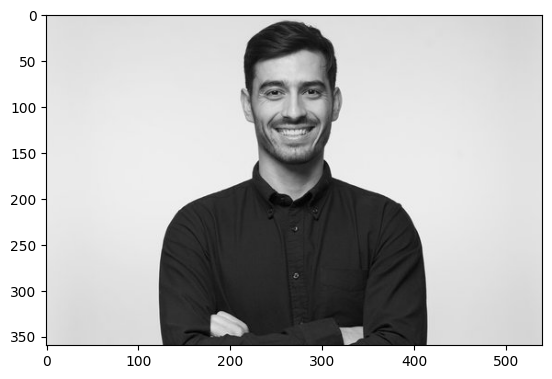

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread(r'C:\Users\Prasanna dindi\OneDrive\Desktop\udemy course\openCV\Images\singe face image.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
face_recognizer = cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
face = face_recognizer.detectMultiScale(image,scaleFactor=1.1,minNeighbors=5,minSize=(40,40))
for (x,y,w,h) in face:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
original = cv.cvtColor(image,cv.COLOR_GRAY2RGB)
plt.imshow(original)

Text(0.5, 1.0, 'blurred image')

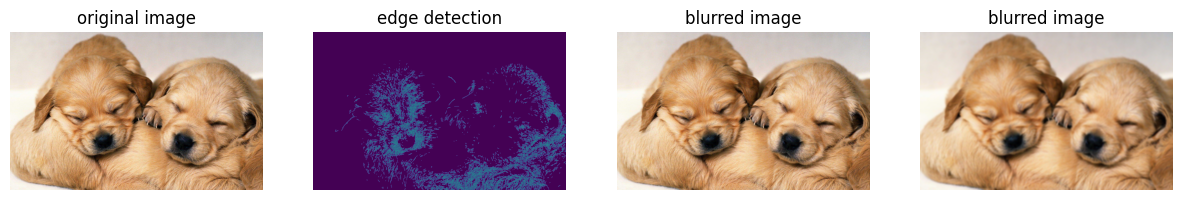

In [35]:
import cv2 as cv
plt.figure(figsize=(15,15))
image = cv.imread(r'C:\Users\Prasanna dindi\OneDrive\Desktop\udemy course\openCV\Images\puppy.jpg')
image = image[:,:,::-1]
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,100,200)
plt.subplot(1,4,1)
plt.imshow(image)
plt.axis('off')
plt.title('original image')

plt.subplot(1,4,2)
plt.imshow(edges)
plt.axis('off')
plt.title('edge detection')

blurred = cv.blur(image,(5,5))
plt.subplot(1,4,3)
plt.imshow(blurred)
plt.axis('off')
plt.title('blurred image')

blurred_more = cv.blur(image,(19,19))
plt.subplot(1,4,4)
plt.imshow(blurred_more)
plt.axis('off')
plt.title('blurred image')